### Introduction

- **Sentiment is the emotion behind customer engagement.** 

- When you monitor sentiment, you try to measure the **tone**, **context**, and **feeling** from customer actions.

- Whether a customer completes a purchase, leaves a review, or mentions your company socially, there is always an **emotional state** connected to their action.

- Customer sentiment can range anywhere from **pleased** or **loving** to **neutral** or **angry**, and no matter where your customers fall on the sentiment spectrum, it’s imperative you understand not only what their emotional state is, but what’s driving it. 


<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/sentiment.jpg" width="600px"></center>

###  Problem Statement

- **Analyzing customer sentiment** helps give **insight** into how **customers feel** about your brand. 

- The more you listen to how your customers feel about recommending your company, giving you a rating, engaging with you on social channels, and giving you direct feedback, the more love everyone is sure to feel, and the deeper your relationships can be.


<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/sentiment2.jpg" width="600px""></center>

**<h4>Business Scenario:</h4>**

- A large electronics company **Green Electric** has been falling behind the competition in terms of providing a good customer service to their customers.

- Their previous marketing campaigns have also been hit or a miss, and they don't know for certain what their customers want.

- They want to **gain deeper audience insight**, **improve** their **customer engagement**, **provide improved customer service** to their customers and also **improve** the **success rate** of their future **marketing campaigns**.

- To achieve this, the management proposed **analyzing** the **sentiment** of different customers for different products.

- But, analyzing customer sentiment can be a **hectic** process if done **manually**, due to the sheer volume of data. So the company wants to **automate** the process of **Sentiment Analysis**. 

- They have assigned their **Data Science team**, the task to automate the Sentiment Analysis of **future reviews**. 

### Importing Packages

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
nltk.download('punkt')
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Data Acquisition

#### Data Description

- We are provided with a **customer review** data of different **Electronic products** sold on an E-commerce platform.

- This massive dataset of reviews will help us **build** a **Sentiment Analysis model** capable of classifying future reviews into their respective sentiment.

- The dataset contains information about the **marketplace**, **customers**, **products**, and also contains the review information including the entire **review text** written by the customer.

- Also provided in the dataset is the `star_rating`. It is the **1-5 star rating** of the review.

| Column | Description |
| :--:| :--: | 
| **marketplace** | 2 letter country code of the marketplace where the review was written. |
| **customer_id** | Random identifier that can be used to aggregate reviews written by a single author. |
| **review_id** | The unique Product ID the review pertains to. |
| **product_id** | Sales for the given department in the given store. |
| **product_parent** | Random identifier that can be used to aggregate reviews for the same product. |
| **product_title** | Title of the product. |
| **product_category** | Broad product category that can be used to group reviews (also used to group the dataset into coherent parts). |
| **star_rating** | The 1-5 star rating of the review. |
| **helpful_votes** | Number of helpful votes. |
| **total_votes** | Number of total votes the review received. |
| **vine** | Review was written as part of the Vine program. |
| **verified_purchase** | The review is on a verified purchase. |
| **review_headline** | The title of the review. |
| **review_body** | The review text. |
| **review_date** | The date the review was written. |

In [0]:
data = pd.read_csv('https://storage.googleapis.com/retail-analytics-data/reviews_us_Electronics_v1_00.tsv', sep='\t', quoting=3)
data.head(3)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31


In [0]:
unq_df=pd.DataFrame(data.nunique())
unq_df=unq_df.T
print("NUmber of unique values in each feature")
unq_df

NUmber of unique values in each feature


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,1,2154357,3093869,185852,166244,167933,1,5,895,934,2,2,1637220,2897248,5904


In [0]:
base_data=data.drop(['customer_id','review_id','product_id','product_parent','review_date','vine','verified_purchase','product_title','marketplace','product_category'],axis=1)
print("Selected few features for base model")
base_data.head(2)

Selected few features for base model


,star_rating,helpful_votes,total_votes,review_headline,review_body
0,5,0,0,Five Stars,As described.
1,5,0,0,It works as advertising.,It works as advertising.


In [0]:
base_data.columns

Index(['star_rating', 'helpful_votes', 'total_votes', 'review_headline',
       'review_body'],
      dtype='object')

### Data Info

In [0]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093869 entries, 0 to 3093868
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   star_rating      int64 
 1   helpful_votes    int64 
 2   total_votes      int64 
 3   review_headline  object
 4   review_body      object
dtypes: int64(3), object(2)
memory usage: 118.0+ MB


**Observations:**

- There are a total of **3093869 rows** in the base_data.

- The base dataset contains **5 columns**.

- There are **3 numerical** columns, and **2 object** type columns.


### Basic Statistics

#### Shape of Data

In [0]:
print(f"no: of records={base_data.shape[0]},no: of features={base_data.shape[1]}")

no: of records=3093869,no: of features=5


#### Data stats

In [0]:
base_data.describe()

,star_rating,helpful_votes,total_votes
count,3.093869e+06,3.093869e+06,3.093869e+06
mean,4.035507e+00,1.859762e+00,2.371095e+00
std,1.387438e+00,2.132770e+01,2.248713e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,1.000000e+00
max,5.000000e+00,1.278600e+04,1.294400e+04


**Observations:**

- **star_rating** column has a **mean** of **4** and a **median** of **5**.
- This implies that it is **negative** (**left**) skewed.


#### Null value treatment

In [0]:
print("Number of null values in each feature")
print("----------------------------------------------------------------")
null_df=pd.DataFrame(base_data.isna().sum(),columns=['null_values'])
null_df=null_df.T
null_df

Number of null values in each feature
----------------------------------------------------------------


,star_rating,helpful_votes,total_votes,review_headline,review_body
null_values,0,0,0,31,88


In [0]:
print("Dropped records with null values")
print("----------------------------------------------------------------")
base_data.dropna(how='any',axis=0,inplace=True)
null_df=pd.DataFrame(base_data.isna().sum(),columns=['null_values'])
null_df=null_df.T
null_df

Dropped records with null values
----------------------------------------------------------------


,star_rating,helpful_votes,total_votes,review_headline,review_body
null_values,0,0,0,0,0


In [0]:
print("shape of data-set after null value treatment")
print(f"no: of records={base_data.shape[0]},no: of features={base_data.shape[1]}")

shape of data-set after null value treatment
no: of records=3093750,no: of features=5


### Data Preprocessing

In [0]:
import re

#### Html_URL removal

In [0]:
def html_url_remover(df,feature):
    clean=[]
      for sentence in df[feature].values:
        pattern1=re.compile('<.*?>')
        sentence=re.sub(pattern1,'',sentence)
        pattern2=re.compile('https[s]?://\S+')
        sentence=re.sub(pattern2,'',sentence)
        clean.append(sentence)
    df[feature]=clean
    return df


#### Decontracting words

In [0]:
def decontracted(df,feature):
    clean=[]
    for sentence in df[feature].values:
        # # general
        sentence = re.sub(r"won't", "will not", sentence)
        sentence = re.sub(r"can\'t", "can not", sentence)
        sentence = re.sub(r"n\'t", " not",sentence)
        sentence = re.sub(r"\'re", " are",sentence)
        sentence = re.sub(r"\'s", " is", sentence)
        sentence = re.sub(r"\'d", " would",sentence)
        sentence = re.sub(r"\'ll", " will",sentence)
        sentence = re.sub(r"\'t", " not",sentence)
        sentence = re.sub(r"\'ve", " have",sentence)
        sentence = re.sub(r"\'m", " am",sentence)
        clean.append(sentence)
    df[feature]=clean
    return df

#### Removing Special characters

In [0]:
def remove_special_characters(df,feature):
    clean=[]
    for sentence in df[feature].values:
        pattern = r'[^a-zA-z0-9\s]'
        clean.append(re.sub(pattern, '',sentence))
    df[feature]=clean
    return df

#### Remove whitespaces and newline

In [0]:
def whitespace_remover(df,feature):
    clean=[]
    for sent in df[feature].values:
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        clean.append(sent)
    df[feature]=clean 
    return df

#### Converting to lowercase

In [0]:
def lowercase(df,feature):
    df[feature]=df[feature].map(lambda x:x.lower())
    return df

#### Removing Stopwords

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [0]:
from nltk.tokenize import word_tokenize
def stopword_removing(df,feature):
    clean=[]
    for sentance in df[feature].values:
        wrd_lst=word_tokenize(sentance)
        sent=' '.join(word for word in wrd_lst if word not in stopwords)
        clean.append(sent.strip())
    df[feature]=clean
    return df

In [0]:
def text_normalizing(df,feature):
    #removing urls and html tags
    df=html_url_remover(df,feature)
    #decontracting words
    df=decontracted(df,feature)
    #remove special characters
    df=remove_special_characters(df,feature)
    #convert to lowercase
    df=lowercase(df,feature)
    #white-space remover
    df=whitespace_remover(df,feature)
    #removing stopwords
    df=stopword_removing(df,feature)
    return df


#### Normalizing review_headline

In [0]:
base_data=text_normalizing(base_data,'review_headline')

#### Normalizing review_body

In [0]:
base_data=text_normalizing(base_data,'review_body')

### Feature Extraction

#### Sentiment analysis-review_body

In [0]:
from textblob import TextBlob
polarity=[]
subjectivity=[]
for revw in base_data.review_body.values:
    blob=TextBlob(revw)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)
base_data['polarity']=polarity
base_data['subjectivity']=subjectivity
base_data.head(3)

,star_rating,helpful_votes,total_votes,review_headline,review_body,polarity,subjectivity
0,5,0,0,five stars,described,0.0,0.0
1,5,0,0,works advertising,works advertising,0.0,0.0
2,5,1,1,five stars,works pissa,0.0,0.0


In [0]:
print("Shape of data-post text processing and feature extraction")
print("--------------------------------------------------------------------------")
print(f"no: of records={base_data.shape[0]},no: of features={base_data.shape[1]}")

Shape of data-post text processing and feature extraction
--------------------------------------------------------------------------
no: of records=3093750,no: of features=7


In [0]:
print("Unique values in each feature")
print("------------------------------------------------------------")
unq_df=pd.DataFrame(base_data.nunique(),columns=['unq_values'])
unq_df=unq_df.T
unq_df

Unique values in each feature
------------------------------------------------------------


,star_rating,helpful_votes,total_votes,review_headline,review_body,polarity,subjectivity
unq_values,5,895,934,1262381,2821810,350760,299741


### EDA

#### Distribution of start ratings

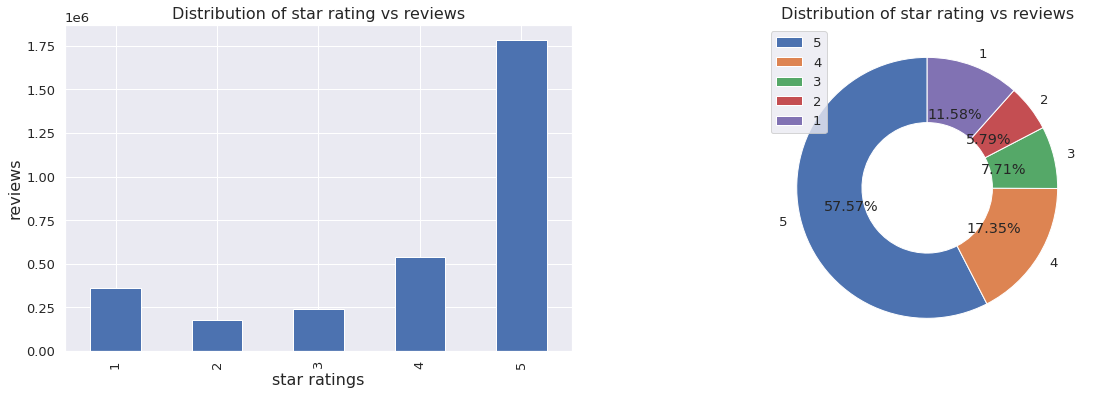

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
base_data['star_rating'].value_counts().sort_index().plot(kind='bar',fontsize=13)
plt.xlabel('star ratings',fontsize=16)
plt.ylabel('reviews',fontsize=16)
plt.title('Distribution of star rating vs reviews',fontsize=16)

plt.subplot(1,2,2)
counts=[i for i in base_data['star_rating'].value_counts().sort_index(ascending=False).values]
indices=[i for i in base_data['star_rating'].value_counts().sort_index(ascending=False).index]
plt.pie(counts,labels=indices,wedgeprops=dict(width=0.5),startangle=90,autopct='%1.2f%%')
plt.legend()
plt.title('Distribution of star rating vs reviews',fontsize=16)
plt.show()

**Observations:**

- We can observe that most of the reviews have a **5 star rating** with a **57.6%** share of all the reviews.

- It is followed by 4 stars, then 1 star, 3 stars, and then 2 stars.

- **2 star rating** has the **least share** of the reviews with just **5.8%** reviews having this rating.

- This tells us that most of the people **usually** *leave a 5 star review* for the product they have bought and **less frequently** will *leave a low star review*.

#### Distribution of Polarity values

In [0]:
pos_count=base_data[base_data['polarity']>0]['polarity'].count()
pos_count

2535165

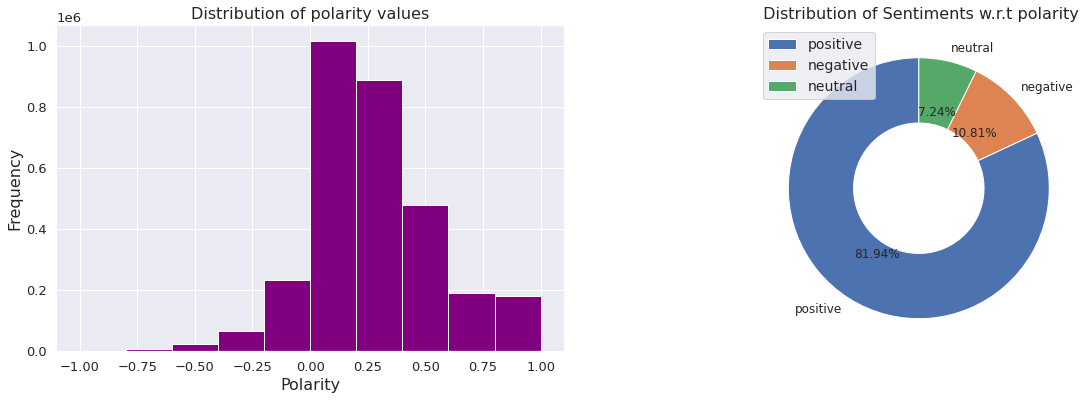

In [0]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
base_data['polarity'].plot(kind='hist', color='Purple', fontsize=13)
plt.xlabel('Polarity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of polarity values',fontsize=16)

pos_count=base_data[base_data['polarity']>0]['polarity'].count()
neg_count=base_data[base_data['polarity']<0]['polarity'].count()
neu_count=base_data[base_data['polarity']==0]['polarity'].count()
sent_lst=[pos_count,neg_count,neu_count]
status=['positive','negative','neutral']
plt.subplot(1,2,2)
plt.pie(sent_lst,labels=status,wedgeprops=dict(width=0.5),startangle=90,autopct='%1.2f%%',textprops={'fontsize': 12})
plt.legend(fontsize=14)
plt.title(' Distribution of Sentiments w.r.t polarity',fontsize=16)
plt.show()

**Observations:**

- **Most** of the **polarity values** are **greater than 0**, and only a small proportion of values have a polarity less than 0.

- It is evident that **most reviews** have a **positive sentiment** based on the polarity values.

- The *polarity values* follow a **similar trend** as the *star rating*, as most of the reviews having a 5 star rating, which should usually mean a positive sentiment. 

#### Relationship between star rating and polarity scores

Text(0.5, 1.0, 'Correlation Between the Star Rating and Polarity of Reviews')

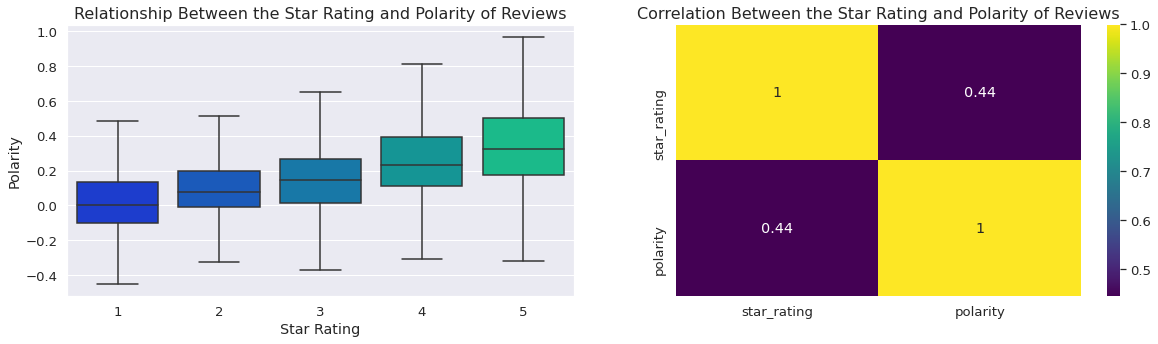

In [0]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.boxplot(data=base_data, x='star_rating', y='polarity', palette='winter', width=0.8, showfliers=False)
plt.xlabel('Star Rating')
plt.ylabel('Polarity')
plt.title('Relationship Between the Star Rating and Polarity of Reviews', fontsize=16)

plt.subplot(1,2,2)
sns.heatmap(base_data[['star_rating', 'polarity']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Between the Star Rating and Polarity of Reviews', fontsize=16)

**Observations:**

- From the boxplot, we can infer that as the **star rating increases** the **highest polarity** value is also **increasing**.

- This **doesn't prove** that there is any *positive correlation* between the two features.

- Also, *even at 4 and 5 star ratings* the box plot is showing reviews with **negative polarity** or negative **sentiment**.

  - And there is **positive polarity** at *1 and 2 star ratings*.

- `star_rating` and `polarity` have a **positive correlation** of **0.44**

- This **isn't a strong positive correlation**, but is a positive correlation nonetheless.

#### Analysing reviews with negative polarity but 5star ratings

In [0]:
val=base_data.loc[(base_data['star_rating']==5)&(base_data['polarity']<0),['review_body']].count()
print(f"number of review which exhibit negative sentiment ,but marked 5start rating are:{val}")

number of review which exhibit negative sentiment ,but marked 5start rating are:review_body    74352
dtype: int64


In [0]:
temp=base_data.loc[(base_data['star_rating']==5)&(base_data['polarity']<0),['review_body']]
for review in temp['review_body'].values[:10]:
    print(review)

works expected well made cable
hard beat price seem work quality pay
phones dead prior replacing new replacement batteries
expected
cord tooooo long plus not cl
quality construction small heavy construction works well record player
price quality ratio headphones fantastic occasional trouble microphone phone though although sometimes microphone performs fantastically difficult conditions
thought laptop dead power cord money saver
hdmi cables mediabridge work great monster cables way expensive broken no apparent reason hold years
arrived time little larger expected not problem thanks


**Observations:**

- These reviews contain some words like **dead**, **trouble**, **problem** that are usually linked with a **negative emotion**.

  - As a result, the **polarity** values are **negative**.

  - But these words are used in order to **praise** the product.

- The **star ratings** are **high** because the customers actually are **satisfied** with the product and showing a **positive sentiment** in this context.

#### Analysing reviews with positive polarity but low ratings

In [0]:
val=base_data.loc[(base_data['star_rating']==1|2)&(base_data['polarity']>0),['review_body']].count()
print(f"number of review which exhibit positive sentiment,but marked 1 or 2star rating are:{val}")

number of review which exhibit positive sentiment,but marked 1 or 2star rating are:review_body    182446
dtype: int64


In [0]:
temp=base_data.loc[(base_data['star_rating']==1|2)&(base_data['polarity']>0),['review_body']]
for review in temp['review_body'].values[:5]:
  print(review)
  print('\n')

excellent sound good price ear pads less expensive nonbreathable plastic not durable somewhat uncomfortable wearing 12 hour sittingthese sony headphones comfortable last longer think sound monoprice headphones slightly better grandpa said 34you pays money takes choice34 [ [ asinb000092ypr sony mdrv150 monitor series headphones ] ] 1846 punch 34the ministerial crisis341884 huckleberry finn mark twainthanks new york timeson language pays yer moneyby william safirepublished february 28 1988


decided keep item ezcast not quite good chromecast features cheaper couple features actually like little better chromecast actually works firefox html 5 video also setup goes pretty smoothly plus maybe even better chromecast secure remains seen something tells chinese company manufactures lets device vulnerable hacking see support site windows app chinese best tell not conducive north american customers hopefully gets improved soon


not hold long charge greencapped compeditors even though mwhr adver

**Observations:**

- All these reviews contains words like **best**, **excellent**, **better**, **improved** that are used to express **positive emotions**.

  - As a result, the **polarity** values are **positive**.

  - But, there is also a **negation** in most of these reviews, due to which these words are actually expressing **dissatisfaction**.

- The **star ratings** for these reviews are **low** because the customers actually are **complaining** about their products and showing **negative sentiment**.

#### Distribution of subjectivity values for review

Text(0.5, 1.0, 'Distribution of Subjectivity Values')

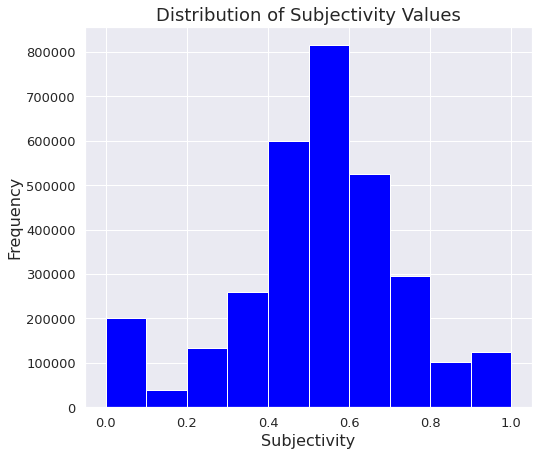

In [0]:
plt.figure(figsize=(8, 7))
base_data['subjectivity'].plot(kind='hist', color='blue', fontsize=13)
plt.xlabel('Subjectivity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Subjectivity Values', fontsize=18)

**Observations:**

- **Subjectivity** values follow a **normal distribution**.

- **More than 80%** values have a *subjectivity* **higher than 0.4**.

- The reviews need to be subjective in order to **build** a **robust** sentiment analysis model.

  - Because *objective reviews* will **downgrade** the **performance** of the model.

#### Setting threshold for subjectivity of reviews

##### Reviews having Subjectivity value of 0.1

In [0]:
for review in base_data[base_data['subjectivity'] == 0.1].sample(5, random_state=1)['review_body']:
    print(review, '\n')

actually like beats dre headphones 

worth money however watch shipping cost 4 times price product 

received cd player not one pictured amazon pictured described amazon listing said came headphones cd player received mail came ear buds part reason ordered player fact supposed come actual headphones would not recommend cd player seller 

returned immediately turn table would not level properly everything listened sounded wavy warped 

worked seamlessly bose bluetooth mobile speaker 



In [0]:
print('proportion of reviews after setting subjectivity to 0.1:', (len(base_data[base_data['subjectivity'] >= 0.1])/3093869)*100)

proportion of reviews after setting subjectivity to 0.1: 93.50670632790205


##### Reviews having Subjectivity value of 0.4

In [0]:
for review in base_data[base_data['subjectivity'] == 0.4].sample(5, random_state=1)['review_body']:
    print(review, '\n')

got 2 channels anteena looking least 10 channels 

real happy sub especially extra jacks back hook good two channel listening american idol comes alive watching thing love 

fit needs 

value moneybuilt quality gooddesign averageeasy use asia [ 2pins3 pins not fit ] us type pins [ 23 pins ] 

researched options choosing isobar 4 6 outlet surge protectorssp old sp no longer working properlylike metal housing status lights preferred guessing units still working using 4 outlet models tripplite ups 6 outlet models electronics not need ups good surge protectors 



In [0]:
print('proportion of reviews after setting subjectivity to 0.4:', (len(base_data[base_data['subjectivity'] >= 0.4])/3093869)*100)

proportion of reviews after setting subjectivity to 0.4: 79.51726462885145


#### Most common words in highly positive reviews

(-0.5, 1999.5, 1499.5, -0.5)

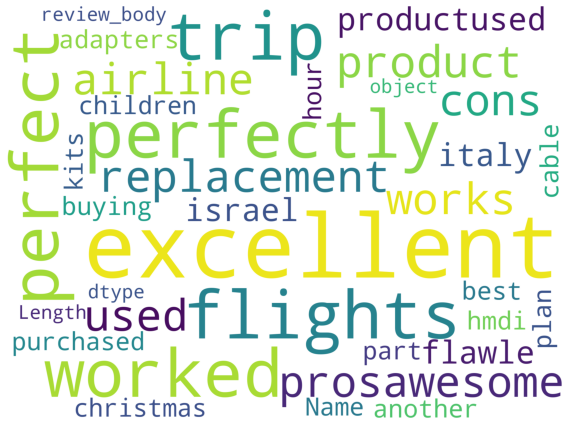

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=1500, max_words=200,background_color='White').\
generate(str(base_data[(base_data['star_rating'] == 5) &(base_data['polarity'] == 1)].sample(30000, random_state=0)['review_body']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The most common words in the positive reviews are **perfect**, **awesome**, **perfectly**, **excellent**, etc.

- These words are usually used to indicate a **positive sentiment**.

#### Most common words in highly negative reviews

(-0.5, 1999.5, 1499.5, -0.5)

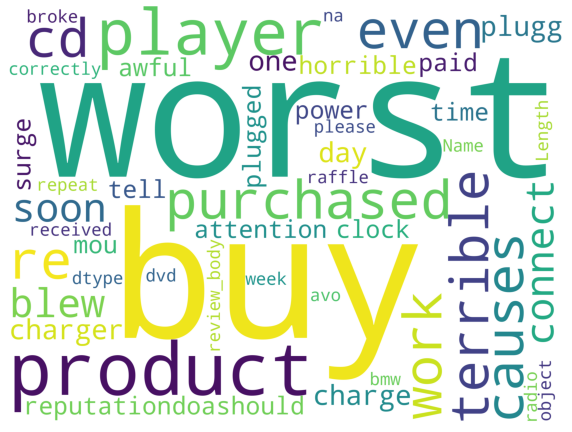

In [0]:
wordcloud = WordCloud(width=2000, height=1500, max_words=200,background_color='White').\
generate(str(base_data[(base_data['star_rating'] == 1) &(base_data['polarity'] == -1)]['review_body']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The most common words in the positive reviews are **worst**, **terrible**, **awful** etc.

- These words are usually used to indicate a **negative sentiment**.

#### Most common words in highly neutral reviews

(-0.5, 1999.5, 1499.5, -0.5)

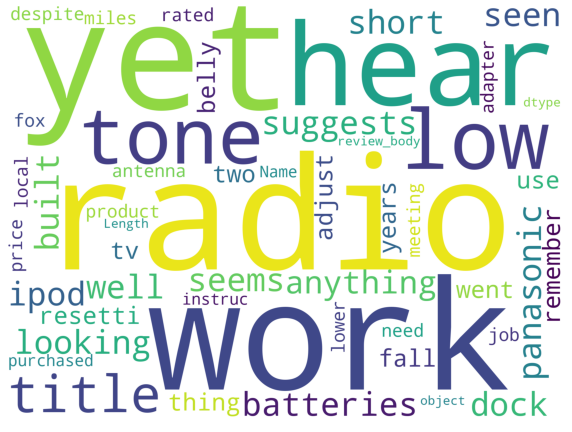

In [0]:
wordcloud = WordCloud(width=2000, height=1500, max_words=200,background_color='White').\
generate(str(base_data[(base_data['star_rating'] == 3) &(base_data['polarity'] == 0)].sample(10000, random_state=0)['review_body']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The *most common words for neutral reviews* are **radio**, **yet**, **work**, **hear**, etc.

- These words **don't express** a **clear sentiment** and hence are appropriate for neutral reviews.

In [0]:
import pickle
with open('/content/drive/My Drive/AI/rf_xg/customer_sentiment','wb') as f:
    pickle.dump([base_data],f)

In [0]:
base_data.head(3)

,star_rating,helpful_votes,total_votes,review_headline,review_body,polarity,subjectivity
0,5,0,0,five stars,described,0.0,0.0
1,5,0,0,works advertising,works advertising,0.0,0.0
2,5,1,1,five stars,works pissa,0.0,0.0


#### correlation between helpful_votes and polarity

Text(0.5, 1.0, 'Correlation Between the helpful_votes and Polarity of Reviews')

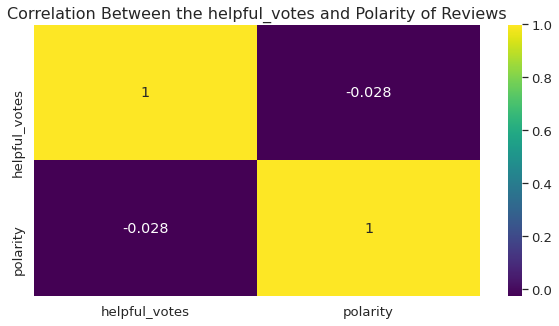

In [0]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))
sns.heatmap(base_data[['helpful_votes', 'polarity']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Between the helpful_votes and Polarity of Reviews', fontsize=16)

#### correlation between total_votes and polarity

Text(0.5, 1.0, 'Correlation Between the total_votes and Polarity of Reviews')

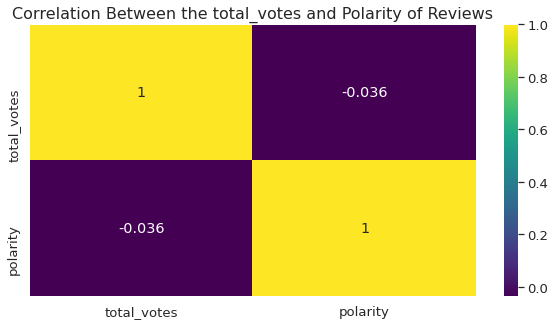

In [0]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))
sns.heatmap(base_data[['total_votes', 'polarity']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Between the total_votes and Polarity of Reviews', fontsize=16)

### Preparing data for modelling

#### Removing redundant columns

In [0]:
base_data.drop(['helpful_votes','total_votes'],axis=1,inplace=True)
print(f"features left-{base_data.columns}")

features left-Index(['star_rating', 'review_headline', 'review_body', 'polarity',
       'subjectivity'],
      dtype='object')


#### Deduplication of rows

In [0]:
print(f"data shape pre deduplication:{base_data.shape}")
base_data.drop_duplicates(subset=None, keep='first', inplace=True)
print(f"data shape post deduplication:{base_data.shape}")

data shape pre deduplication:(3093750, 5)
data shape post deduplication:(2867670, 5)


#### Removing samples have subjectivity less than 0.4

In [0]:
print(f"data shape pre deduplication:{base_data.shape}")
base_data=base_data[base_data['subjectivity']>0.4]
print(f"data shape post deduplication:{base_data.shape}")

data shape pre deduplication:(2867670, 5)
data shape post deduplication:(2255642, 5)


#### Labelling polarity scores

In [0]:
pos_df=base_data[(base_data['star_rating'] > 3) & (base_data['polarity'] >= 0.5)]
neg_df=base_data[(base_data['star_rating'] <3) & (base_data['polarity'] < 0.1)]
neu_df=base_data[(base_data['star_rating'] == 3) & ((base_data['polarity'] >=-0.1) & (base_data['polarity'] <=0.1))]
pos_df['sentiment']='positive'
neg_df['sentiment']='negative'
neu_df['sentiment']='neutral'
final_df = pd.concat([pos_df, neg_df, neu_df], ignore_index=True)
print("Final data frame -post processing,sentiment analysis,feature extraction and labelling")
print("--------------------------------------------------------------------------------------------------------------------------")
final_df.head()

Final data frame -post processing,sentiment analysis,feature extraction and labelling
--------------------------------------------------------------------------------------------------------------------------


,star_rating,review_headline,review_body,polarity,subjectivity,sentiment
0,5,five stars,works great,0.800000,0.7500,positive
1,4,four stars,great sound compact battery life seems good ha...,0.675000,0.6875,positive
2,5,five stars,alll good,0.700000,0.6000,positive
3,5,five stars,excellent gain radio frequency reception stock...,1.000000,1.0000,positive
4,4,affordable functional,wish could tilt works fine especially consider...,0.504167,0.7500,positive


In [0]:
print(f"no: of records={final_df.shape[0]},no: of features={final_df.shape[1]}")

no: of records=659810,no: of features=6


In [0]:
import pickle
with open('/content/drive/My Drive/AI/rf_xg/final_df_customer','wb') as f:
    pickle.dump([final_df],f)

### Distribution of sentiment-Target variable

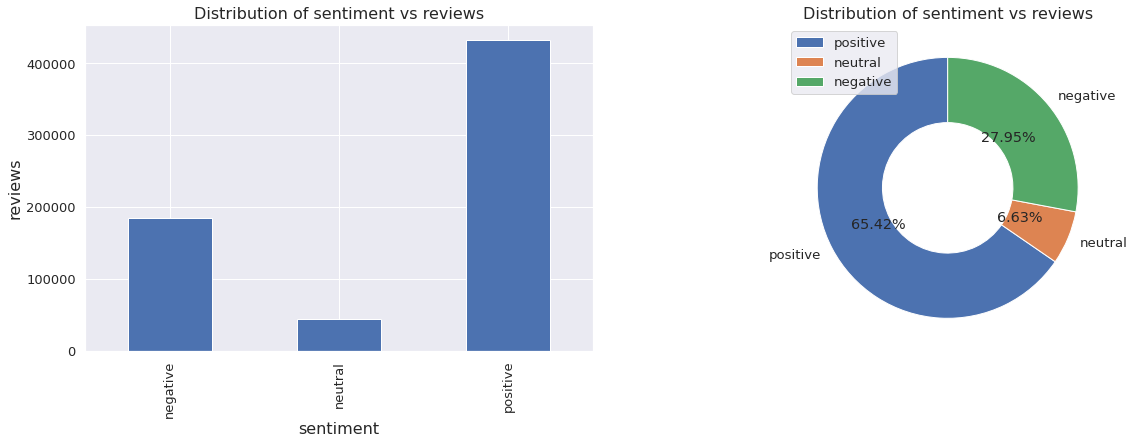

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
final_df['sentiment'].value_counts().sort_index().plot(kind='bar',fontsize=13)
plt.xlabel('sentiment',fontsize=16)
plt.ylabel('reviews',fontsize=16)
plt.title('Distribution of sentiment vs reviews',fontsize=16)

plt.subplot(1,2,2)
counts=[i for i in final_df['sentiment'].value_counts().sort_index(ascending=False).values]
indices=[i for i in final_df['sentiment'].value_counts().sort_index(ascending=False).index]
plt.pie(counts,labels=indices,wedgeprops=dict(width=0.5),startangle=90,autopct='%1.2f%%')
plt.legend()
plt.title('Distribution of sentiment vs reviews',fontsize=16)
plt.show()

### Model building and evaluation

#### Data Splitting-train_test

In [0]:
import pickle
with open('/content/drive/My Drive/AI/rf_xg/final_df_customer','rb') as f:
  final_df=pickle.load(f)

In [0]:
final_df=final_df[0]

In [0]:
X=final_df[['review_body']]
Y=final_df['sentiment']

In [16]:
from sklearn.model_selection import train_test_split
xtrain_data,xtest_data,ytrain,ytest=train_test_split(X,Y,test_size=0.20,stratify=Y)
print("Train data")
print(f"xtrain_data:{xtrain_data.shape},ytrain:{ytrain.shape}")
print("-----------------------------------------------")
print("Test data")
print(f"xtest_data:{xtest_data.shape},ytest:{ytest.shape}")

Train data
xtrain_data:(527848, 1),ytrain:(527848,)
-----------------------------------------------
Test data
xtest_data:(131962, 1),ytest:(131962,)


#### vectorizing features

##### vectorizing review_body

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(min_df=10,max_features=15000)
tf.fit(xtrain_data['review_body'].values)
X_train=tf.transform(xtrain_data['review_body'].values)
X_test=tf.transform(xtest_data['review_body'].values)

In [20]:
print("Data matrix")
print(f"Train data-:{X_train.shape},Train data-target-:{ytrain.shape}")
print(f"Test data-:{X_test.shape},Test data-target-:{ytest.shape}")

Data matrix
Train data-:(527848, 15000),Train data-target-:(527848,)
Test data-:(131962, 15000),Test data-target-:(131962,)


#### Model

##### Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
mn=LogisticRegression()
ovr_mn=OneVsRestClassifier(mn)
ovr_mn.fit(X_train,ytrain)
ytrain_pred=ovr_mn.predict(X_train)
ytest_pred=ovr_mn.predict(X_test)
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(ytest,ytest_pred))  

-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

    negative       0.87      0.96      0.91    147530
     neutral       0.75      0.37      0.49     34997
    positive       0.99      1.00      0.99    345321

    accuracy                           0.94    527848
   macro avg       0.87      0.77      0.80    527848
weighted avg       0.94      0.94      0.94    527848

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

    negative       0.86      0.95      0.90     36882
     neutral       0.70      0.33      0.45      8750
    positive       0.99      1.00      0.99     86330

    accuracy                           0.94    131962
   macro avg       0.85      0.76      0.78    131962
weighted avg       0.93      0.94      0.93    131962



**Observations:**

- Model achieved 94% accuracy on both train and test data.

- F1_score of 78% implies that model is balanced in predicting between categories/classes.

- Model performance on neutral category is not great.It is able to predict only 45% of neutral reviews correctly, among the actual total neutral reviews.
- Low performance on neutral reviews may be due to very low samples in that particular category.


### Conclusion

- We cleaned the reviews by:
  - **Changing** the **case** of each word to **lowercase**,
  - **Fixing** certain words,
  - **Removing** all the **punctuation marks** from each review, and
  - **Removing** any additional white space from each review.
  - **Removing** all the stop words.

- Then, we calculate the **polarity** and **subjectivity** values for each review.

- This allowed us to **analyze** our data **in-depth** to find relationship between various features like star rating and polarity.

- We also calculated a **threshold** for the **subjectivity** value in our reviews.

- We then found out the **most common words** associated with different sentiments.

- After analyzing the data:
  - We **remove** all **redundant columns** from the data,

  - **Remove** all the **samples** having **subjectivity less than 0.4** i. e. the subjectivity threshold.

  - **Divide reviews into sentiments** based on star rating and polarity.

  - At last, we **split** the **data** into training and test sets.

- During model building, we first created a **TFIDF matrix** of our data and **trained** a **OneVsRest Logistic regression** model.

  - This model was then used to make **predictions** on the test set.

  - It achieved an **accuracy** of **94%** on both train and test sets.

  - This implied that model is not overfitting and is **generalizing** well on unseen data.

